In [51]:
from heron import data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [52]:
bbh_text = np.genfromtxt("/home/daniel/repositories/heron/data/bbh_mass1_only_hp.txt", delimiter=" ")
bbh_test = np.genfromtxt("/home/daniel/repositories/heron/data/bbh_mass1_only_hp_TEST.txt", delimiter=" ")

In [53]:
bbh_text[500], bbh_test[500]

(array([ -9.80005600e-03,   6.50000000e+00,  -4.38945326e-23]),
 array([ -9.80005800e-03,   6.50000000e+00,   6.92835069e-23]))

In [9]:
bbh = data.Data(bbh_text[:,[0,2]], bbh_text[:,1],              
                    #target_names = ["Times", "Strain"],
                    label_names = ["Mass"],
                    test_size = 0,
                    test_targets = bbh_test[:,[0,2]],
                    test_labels = bbh_test[:,1]
                    )

In [10]:
from heron import regression
from heron import kernels

In [124]:
bbh_text[150,1]

5.5

In [140]:
bbh_text[599]

array([  9.99998300e-03,   6.50000000e+00,  -4.97247400e-26])

In [125]:
x0 = [(1/np.std(bbh.labels))**2, 5000, 2]
gp = regression.Regressor(bbh, kernel=kernels.SquaredExponential(ndim=2), yerror = 1e-23, tikh=1e-6)
gp.set_hyperparameters(x0)

-73086.145793632488

In [15]:
gp.optimise()

      fun: 9401.2892206874858
 hess_inv: array([[-1908.12860827,   256.43393954,   419.51280698],
       [  256.43393954,   -34.44933025,   -56.34873204],
       [  419.51280698,   -56.34873204,   -92.14680923]])
      jac: array([ 0.0062843 ,  2.1593599 ,  0.77165164])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 58
      nit: 4
     njev: 48
   status: 2
  success: False
        x: array([  311.47509269,   578.38088404,  1787.73028106])

In [43]:
bbh_test[100]

array([  1.99973000e-04,   5.00000000e+00,   7.46837377e-23])

In [44]:
bbh_text[100]

array([  1.99974000e-04,   5.00000000e+00,   1.58430564e-22])

In [31]:
bbh_text[:,0][10], bbh_text[:,2][10]

(-0.017800053999999999, -1.3061248940248428e-22)

In [62]:
a

array([[ -9.80005600e-03,   4.95610547e-21]])

In [69]:
a = np.atleast_2d(bbh_text[500][[0,2]])
a

array([[ -9.80005600e-03,  -4.38945326e-23]])

In [215]:
a = np.atleast_2d(bbh_text[500:600, [0,2]])
a[:,1] += np.random.rand(100)*200.5e-23
#a[0][1]+=5e-23
p,s = gp.prediction(a)

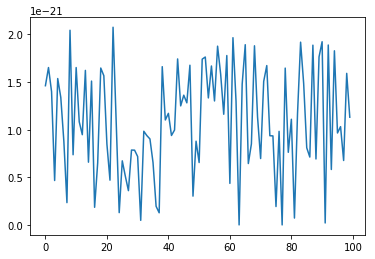

In [216]:
plt.plot(a[:,1])

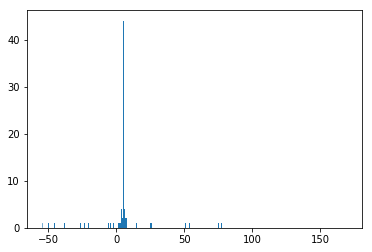

In [217]:
z = plt.hist(p, bins=500)

In [218]:
z[1][np.argmax(z[0])]

4.8847268731620375

ValueError: operands could not be broadcast together with shapes (300,3) (2,) 

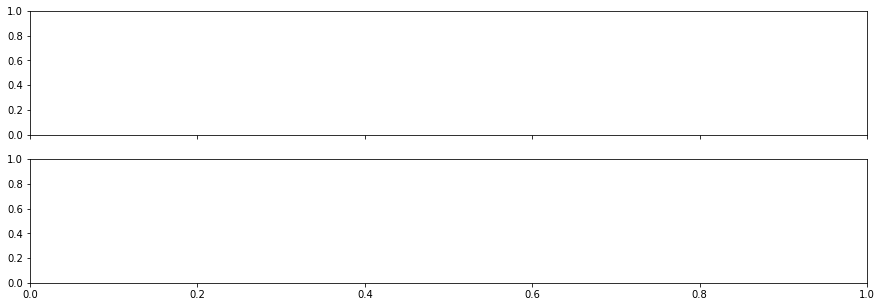

In [16]:
test = np.genfromtxt('/home/daniel/data/imrphenom-test/bbh_mass1_only_hp_test_5d85_S0d25.txt')
f, ax = plt.subplots(2,1, sharey=False, sharex=True, figsize=(15,5))
test_point = 0
t = np.linspace(-0.02,0.005,300)
new_point = np.zeros((300,3))
new_point[:,1] = 5.85
new_point[:,2] = 0.25
new_point[:,0] = t
pred = gp.prediction(new_point)
ax[0].plot(t, pred[0])
ax[0].set_ylim([-.5e-21, .5e-21])
ax[0].set_xlim([-0.005, 0.005])
err = np.diag(pred[1])
err2 = err*1.96
ax[0].fill_between(t, pred[0] - err, pred[0] + err , alpha = 0.2)
ax[0].fill_between(t, pred[0] - err2, pred[0] + err2 , alpha = 0.1)
d = test.T[0][1] - test.T[0][0]
#ax[0].plot(test.T[0]+d, test.T[2])
ax[1].plot(t, np.sqrt((test.T[2] - pred[0])**2))

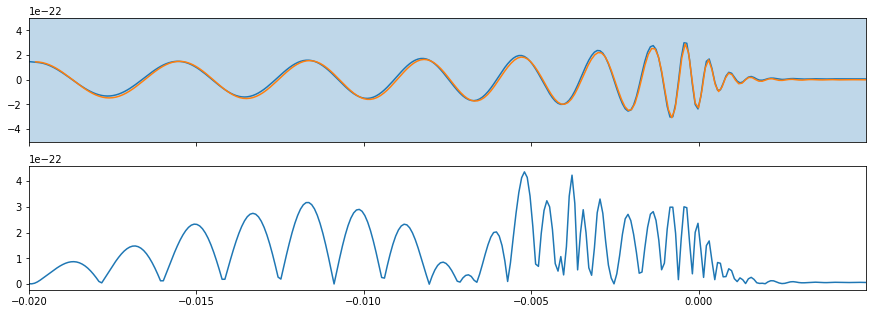

In [13]:
test = np.genfromtxt('/home/daniel/data/imrphenom-test/bbh_mass1_only_hp_test_5d20.txt')
f, ax = plt.subplots(2,1, sharey=False, sharex=True, figsize=(15,5))

t = np.linspace(-0.02,0.005,300)
new_point = np.zeros((300,2))
new_point[:,1] = 5.20
new_point[:,0] = t
pred = gp.prediction(new_point)
ax[0].plot(t, pred[0])
ax[0].set_ylim([-.5e-21, .5e-21])
ax[0].set_xlim([-0.02, 0.005])
err = np.diag(pred[1])
err2 = err*1.96
ax[0].fill_between(t, pred[0] - err, pred[0] + err , alpha = 0.2)
ax[0].fill_between(t, pred[0] - err2, pred[0] + err2 , alpha = 0.1)
d = test.T[0][1] - test.T[0][0]
ax[0].plot(test.T[0]+d, test.T[2])
ax[1].plot(t, np.sqrt((test.T[2] - pred[0])**2))

In [14]:
from heron import acquisition

In [11]:
x0 = [0, 9.5]
gp.expected_improvement(x0)

array([[ -8.87879249e-23]])

In [12]:
from scipy.optimize import minimize

In [18]:
gp.nei([-0.115, 6.7])

array([[ -3.15476884e-19]])

In [7]:
t = np.linspace(-0.02,0.001,300)
new_point = np.zeros((300,2))
new_point[:,1] = 5.20
new_point[:,0] = t

In [10]:
EI = map(gp.expected_improvement, new_point)

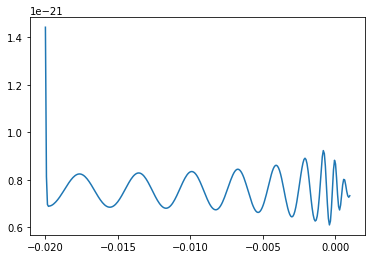

In [29]:
plt.plot(t, EI)

In [28]:
from scipy.optimize import minimize
x0 = [-0.0, 5]
minimize(gp.nei, x0, method='nelder-mead',)

 final_simplex: (array([[ -3.64936543e-05,   5.20756738e+00],
       [ -3.62946399e-05,   5.20762955e+00],
       [ -3.61544282e-05,   5.20759848e+00]]), array([ -8.85746891e-22,  -8.85746800e-22,  -8.85746503e-22]))
           fun: -8.8574689085637502e-22
       message: 'Optimization terminated successfully.'
          nfev: 52
           nit: 27
        status: 0
       success: True
             x: array([ -3.64936543e-05,   5.20756738e+00])

In [23]:
gp.prediction(np.atleast_2d(x0))

(array([ -3.66083102e-22]), array([[  7.90324375e-19]]))

In [31]:
gp.expected_improvement([-0.015, 5.6])

0.0

In [32]:
y_min = gp.training_y.min()

In [36]:
x0 = [0, 9.5]
p, S = gp.prediction(np.atleast_2d(x0))

In [37]:
EI_one = ((y_min - p) * (0.5 + 0.5*m.erf((
          1./np.sqrt(2.))*((y_min - p) /
                           S))))
EI_two = ((S * (1. / np.sqrt(2. * np.pi))) * (np.exp(-(1./2.) *
                                                     ((y_min - p)**2. / S**2.))))
EI = EI_one + EI_two

In [38]:
EI

array([[ -8.87879249e-23]])

In [39]:
S

array([[ -3.66082381e-22]])